In [1]:
import pandas as pd
import matplotlib.pyplot as ptl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [ ]:
# reading the data from the csv file

data=pd.read_csv('CC GENERAL.csv')

In [ ]:
# checking the first 3 rows of the data
data.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

In [15]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace=True)


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_5364\1349868924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_5364\1349868924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [16]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
data.shape

(8950, 18)

In [18]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [19]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [20]:
#we are just check duplicated data in the dataset if there are any duplicated data then we will remove it because it can affect the clustering results
data.duplicated().sum()

np.int64(0)

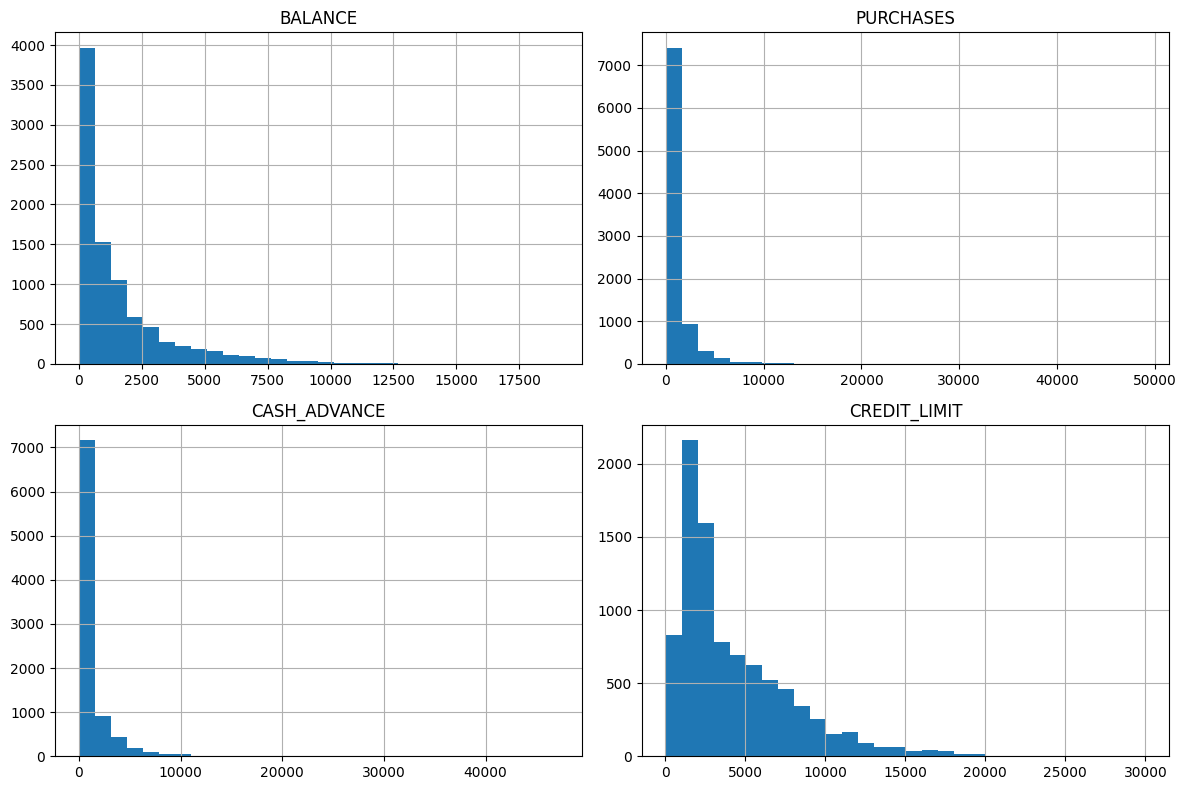

In [21]:
# to check data is skewed or not skewed data is not good for clustering so we need to check the skewness of the data
import matplotlib.pyplot as plt

cols = ['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT']

data[cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


In [25]:
data['PURCHASES'].sort_values(ascending=False).head(10)


550     49039.57
501     41050.40
1256    40040.71
1604    38902.71
3937    35131.16
273     32539.78
1641    31299.35
587     27957.68
3698    27790.42
7046    26784.62
Name: PURCHASES, dtype: float64

In [26]:
(data['CASH_ADVANCE'] > 0).value_counts()


CASH_ADVANCE
False    4628
True     4322
Name: count, dtype: int64

In [22]:
x=data.drop(['CUST_ID'],axis=1)

In [39]:
scaler=StandardScaler()
scaler_id=scaler.fit_transform(x)


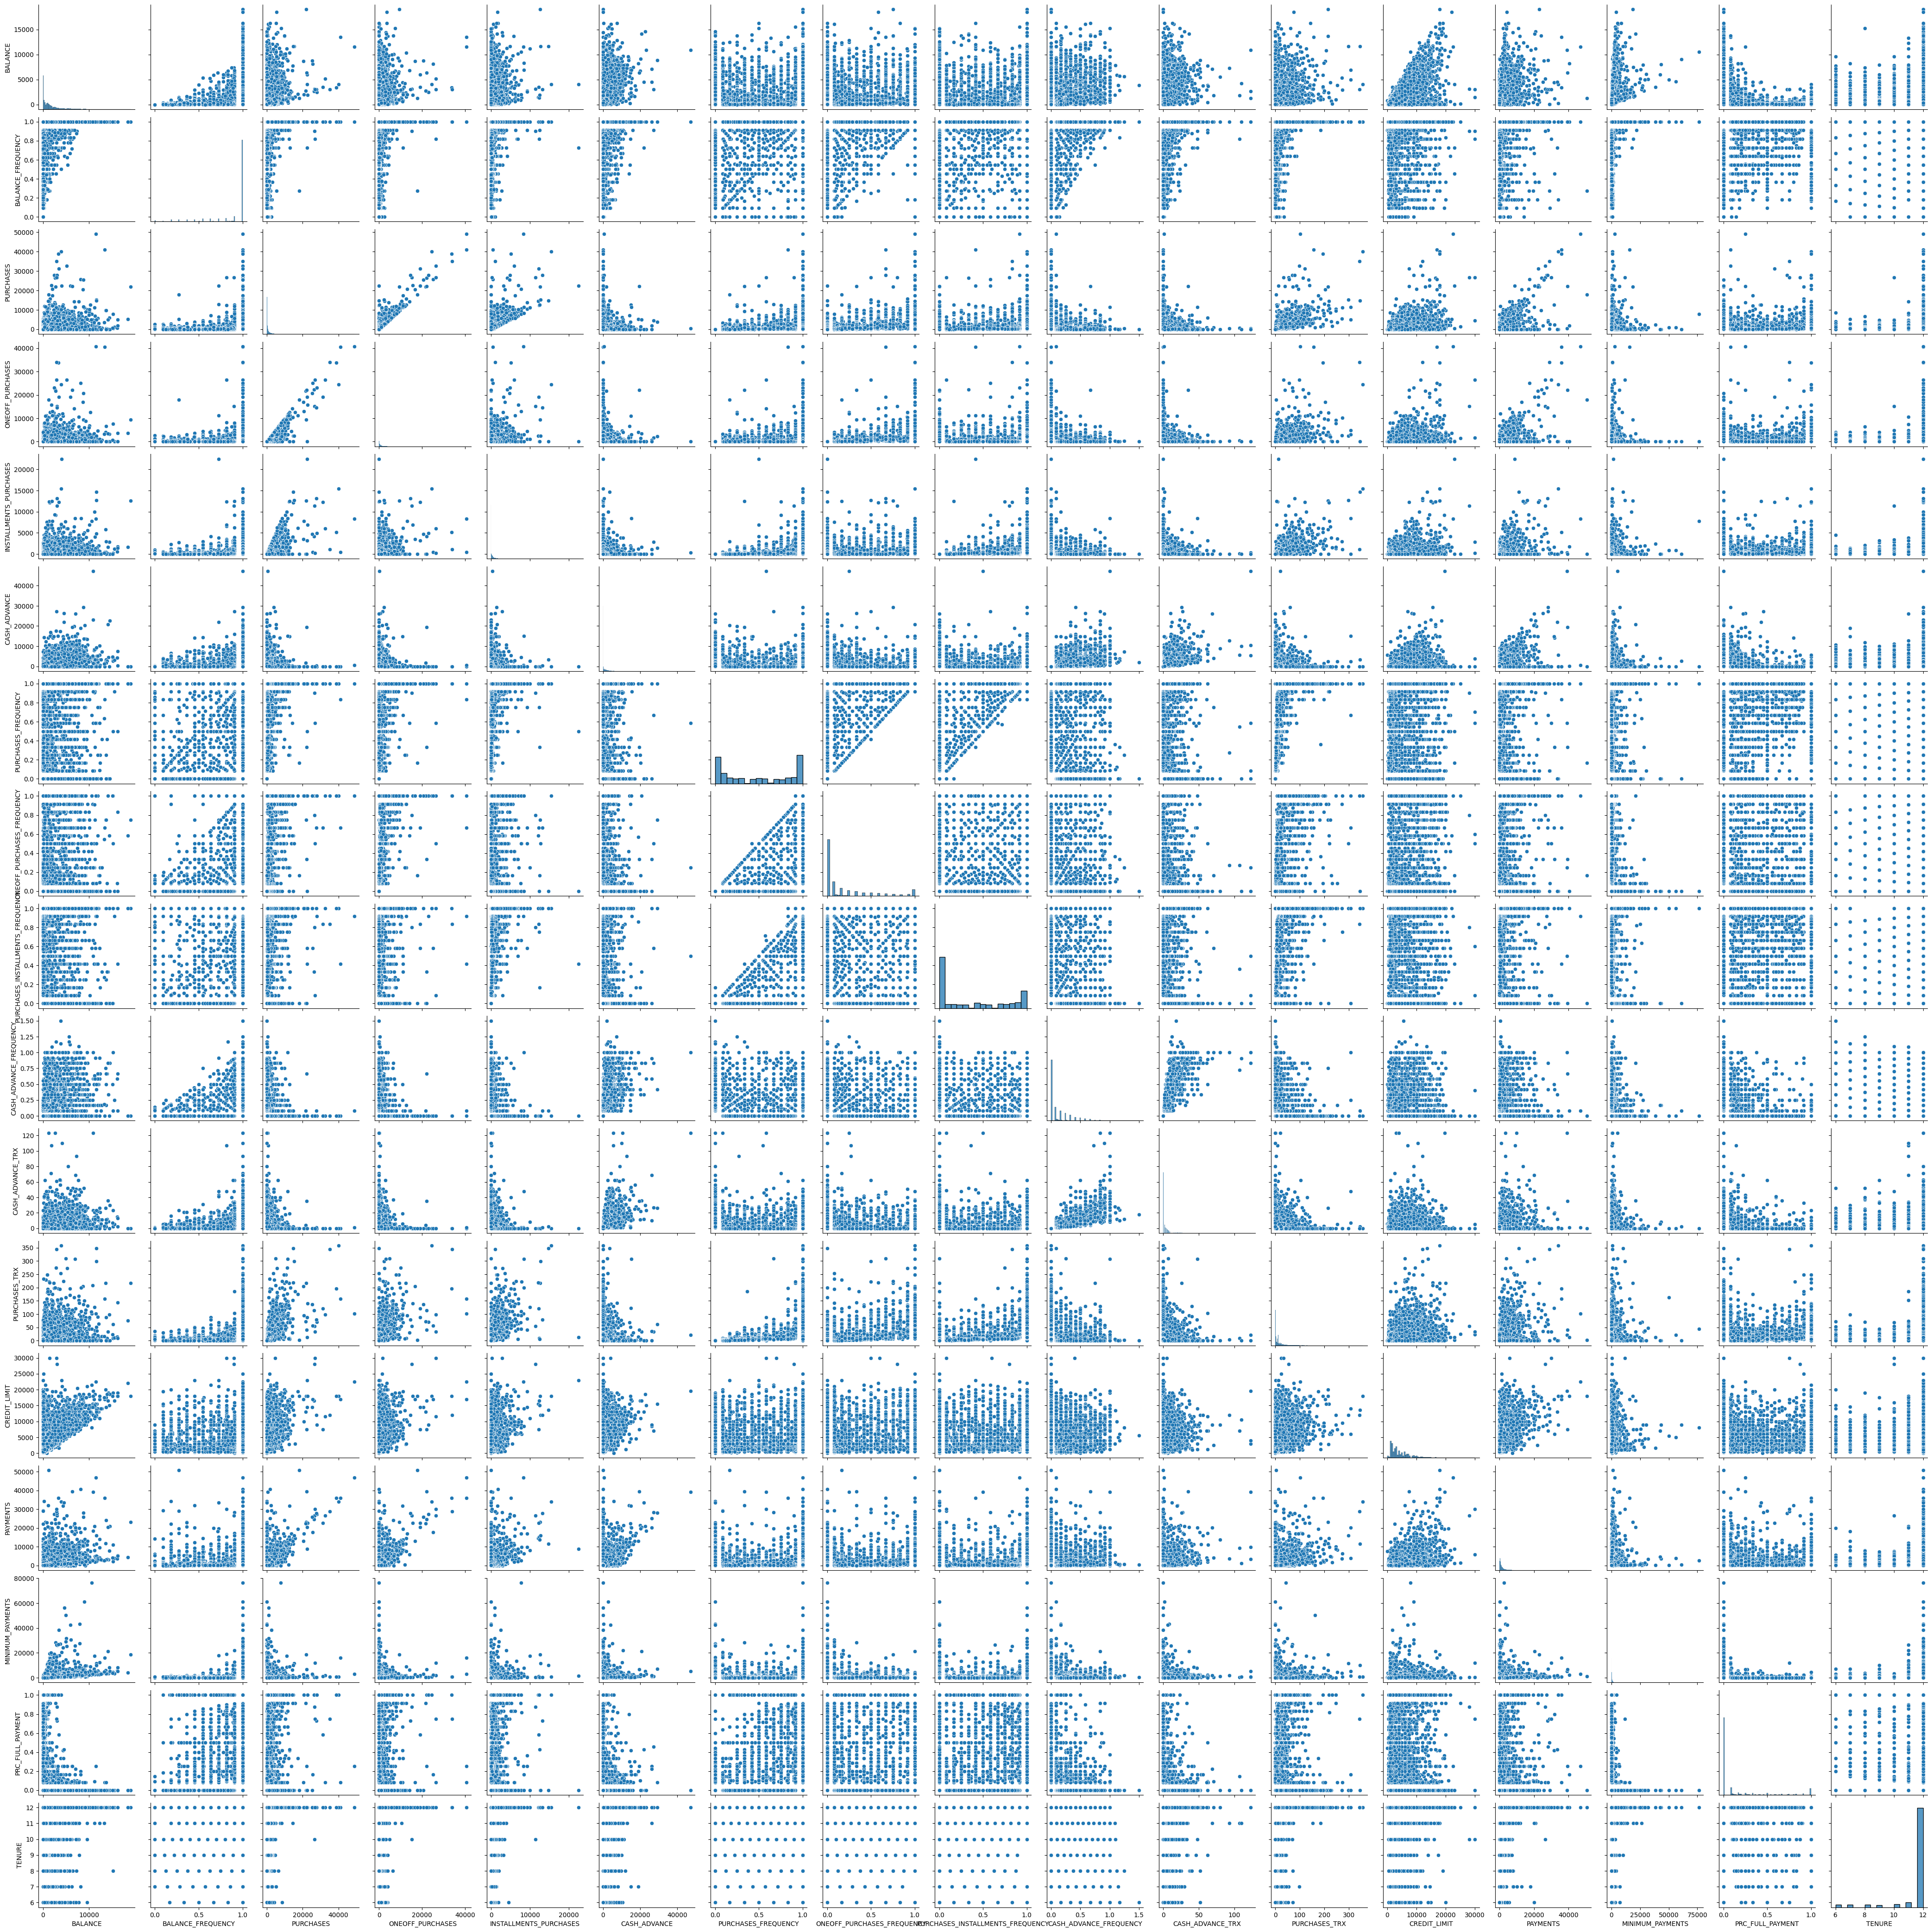

In [40]:
import seaborn as sns
sns.pairplot(data)

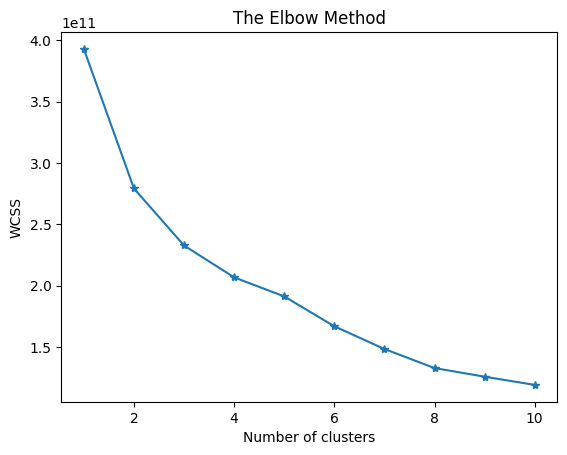

In [41]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)    
plt.plot(range(1,11),Wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)


In [74]:
silhouette=silhouette_score(scaler_id, y_kmeans)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.2061507052357783


In [75]:
pd.crosstab(y_kmeans, data['PURCHASES'])

PURCHASES  0.00      0.01      0.05      0.24      0.70      1.00      \
row_0                                                                   
0               516         1         0         0         0         1   
1              1511         3         1         1         1         1   
2                17         0         0         0         0         0   

PURCHASES  1.40      2.00      4.44      4.80      ...  26784.62  27790.42  \
row_0                                              ...                       
0                 0         0         0         0  ...         0         0   
1                 1         1         0         1  ...         0         0   
2                 0         0         1         0  ...         1         1   

PURCHASES  27957.68  31299.35  32539.78  35131.16  38902.71  40040.71  \
row_0                                                                   
0                 0         0         0         0         0         0   
1                 0         0         0         0         0         0   
2                 1         1         1         1         1         1   

PURCHASES  41050.40  49039.57  
row_0                          
0                 0         0  
1                 0         0  
2                 1         1  

[3 rows x 6203 columns]

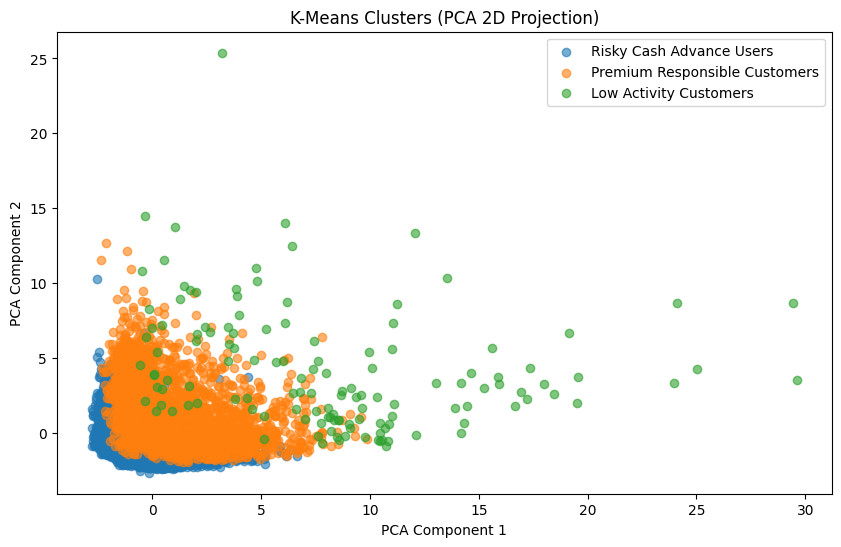

In [ ]:

from sklearn.decomposition import PCA

# X_scaled -> scaled features dataframe (after StandardScaler)
# y_kmeans -> cluster labels from KMeans

# original dataframe me cluster label add kar do
data['Cluster'] = y_kmeans

# cluster profiling: mean of features per cluster



cluster_names = {
    0: "Premium Responsible Customers",
    1: "Risky Cash Advance Users",
    2: "Low Activity Customers"
}


# cluster column me name add kar do
data['Cluster_Name'] = data['Cluster'].map(cluster_names)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler_id)

plt.figure(figsize=(10,6))
for cluster in data['Cluster'].unique():
    plt.scatter(
        X_pca[data['Cluster']==cluster, 0],
        X_pca[data['Cluster']==cluster, 1],
        label=cluster_names[cluster],
        alpha=0.6
    )

plt.title("K-Means Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


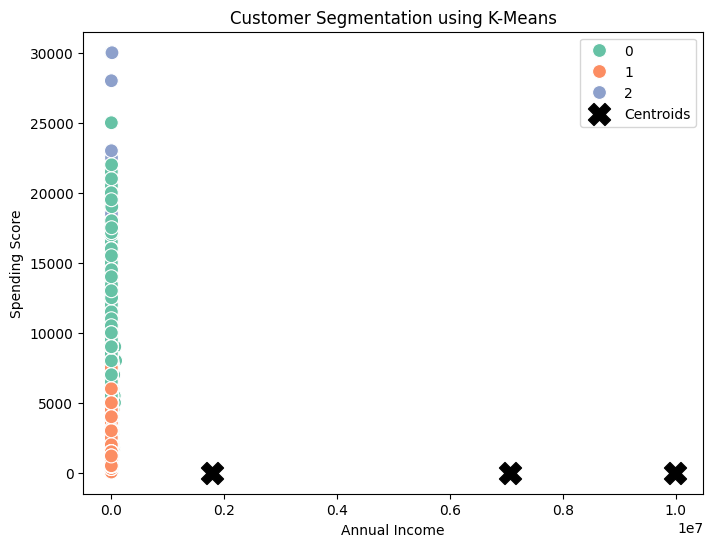

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['MINIMUM_PAYMENTS'],
    y=data['CREDIT_LIMIT'],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot cluster centers
plt.scatter(
    centers_original[:,0],
    centers_original[:,1],
    c="black",
    s=250,
    marker="X",
    label="Centroids"
)

plt.title("Customer Segmentation using K-Means")
plt.xlabel("minimum payments")
plt.ylabel("CREDIT_LIMIT")
plt.legend()
plt.show()


In [87]:
data['Cluster'] = y_kmeans
# Numeric columns only
numeric_cols = data.select_dtypes(include='number').columns
cluster_profile = data.groupby('Cluster')[numeric_cols].mean()
print(cluster_profile)


             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        3395.873986           0.940846   1585.683726        991.355506   
1         854.672173           0.854295    604.110851        312.609897   
2        4797.203573           0.908474  10470.723657       7392.990149   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    594.640589   2099.460914             0.540405   
1                    291.799647    494.585266             0.467692   
2                   3077.897687   5389.983323             0.737381   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.317552                          0.385461   
1                          0.154209                   

In [95]:
cluster_profile = data.drop(['CUST_ID','Cluster_Name'], axis=1).groupby('Cluster').mean()
print(cluster_profile)


             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        3395.873986           0.940846   1585.683726        991.355506   
1         854.672173           0.854295    604.110851        312.609897   
2        4797.203573           0.908474  10470.723657       7392.990149   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    594.640589   2099.460914             0.540405   
1                    291.799647    494.585266             0.467692   
2                   3077.897687   5389.983323             0.737381   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.317552                          0.385461   
1                          0.154209                   

In [91]:


# Cluster 0 me jo customers hain unka ID list
premium_customers = data[data['Cluster'] == 0]['CUST_ID'].tolist()
print(premium_customers[:100])  # pehle 10 IDs


['C10002', 'C10003', 'C10004', 'C10007', 'C10010', 'C10014', 'C10016', 'C10019', 'C10022', 'C10024', 'C10025', 'C10029', 'C10031', 'C10033', 'C10035', 'C10037', 'C10038', 'C10039', 'C10046', 'C10052', 'C10059', 'C10061', 'C10062', 'C10071', 'C10073', 'C10079', 'C10080', 'C10083', 'C10085', 'C10086', 'C10088', 'C10089', 'C10090', 'C10092', 'C10094', 'C10095', 'C10107', 'C10112', 'C10114', 'C10117', 'C10118', 'C10125', 'C10126', 'C10127', 'C10130', 'C10134', 'C10135', 'C10137', 'C10139', 'C10142', 'C10147', 'C10148', 'C10149', 'C10150', 'C10151', 'C10152', 'C10153', 'C10155', 'C10156', 'C10157', 'C10158', 'C10161', 'C10162', 'C10167', 'C10171', 'C10172', 'C10173', 'C10178', 'C10180', 'C10184', 'C10189', 'C10190', 'C10200', 'C10202', 'C10203', 'C10204', 'C10205', 'C10206', 'C10207', 'C10211', 'C10215', 'C10216', 'C10218', 'C10219', 'C10220', 'C10226', 'C10228', 'C10230', 'C10232', 'C10236', 'C10244', 'C10245', 'C10246', 'C10249', 'C10251', 'C10255', 'C10257', 'C10258', 'C10262', 'C10263']